# UCDSML Lecture 12 Part 5

## Neural Networks (MLP)

## Prof. James Sharpnack

In [41]:
# This was modified from Tensorflow tutorial: https://www.tensorflow.org/tutorials/customization/custom_training_walkthrough
# All appropriate copywrites are retained, use of this material is guided by fair use for teaching
# Some modifications made for course STA 208 by James Sharpnack jsharpna@gmail.com

#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

### Importing and installing tensorflow

- install tensorflow 2.0 with conda (you do not need to install tensorflow-gpu for the course)
- tensorflow, build and execute computational graphs
- tensorflow 1.0 and 2.0 differ mainly by making eager execution default, removing sessions

In [42]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

TensorFlow version: 2.0.0
Eager execution: True


In [43]:
tf.keras.backend.set_floatx('float64')

### Loading data

- tensorflow has many built in utilities for getting data
- you could just as easily use requests/pandas

In [44]:
train_dataset_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

Local copy of the dataset file: C:\SPB_Data\.keras\datasets\iris_training.csv


In [45]:
train_df = pd.read_csv(train_dataset_fp)
train_dataset = tf.data.Dataset.from_tensor_slices((train_df.values[:,:-1],train_df.values[:,-1]))

### Tensorflow datasets API

- Datasets API loads and readies data for use in stochastic gradient descent type iteration
- the batch size tells it how many samples for the mini-batch
- Dataset has methods to shuffle the data and apply transformations 

In [46]:
batch_size = 32

train_dataset = train_dataset.shuffle(1000)
train_dataset = train_dataset.batch(batch_size)
## sets batchsize and shuffles

In [47]:
X,y = next(iter(train_dataset))
X

<tf.Tensor: id=287969, shape=(32, 4), dtype=float64, numpy=
array([[4.4, 3. , 1.3, 0.2],
       [5.5, 2.4, 3.7, 1. ],
       [4.9, 2.4, 3.3, 1. ],
       [6.3, 2.3, 4.4, 1.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.8, 4. , 1.2, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [5.6, 2.9, 3.6, 1.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.4, 2.8, 5.6, 2.1],
       [5.7, 3. , 4.2, 1.2],
       [6.9, 3.1, 4.9, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [6.7, 3. , 5.2, 2.3],
       [4.9, 3.1, 1.5, 0.1],
       [7. , 3.2, 4.7, 1.4],
       [4.9, 2.5, 4.5, 1.7],
       [4.8, 3.1, 1.6, 0.2],
       [7.4, 2.8, 6.1, 1.9],
       [6.2, 2.8, 4.8, 1.8],
       [5.2, 3.5, 1.5, 0.2],
       [4.8, 3. , 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [5.6, 2.5, 3.9, 1.1],
       [7.2, 3.2, 6. , 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [5.4, 3.7, 1.5, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.6, 2.9, 4.6, 1.3]])>

### Adding Layers to Keras Model

- keras model can include more layers
- simplest way is with tf.keras.Sequential
- can make custom layers (beyond scope of class)

In [48]:
train_dataset.element_spec
# the input dimenstion is 4  (m x 4 tensors)

(TensorSpec(shape=(None, 4), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [49]:
lin_layers = tf.keras.layers.Dense(3)
lin_layers(X)
## Builds and calls the layer
# these are the logits for the logistical model (later we take the cross entropy which is the softmax function)

<tf.Tensor: id=287996, shape=(32, 3), dtype=float64, numpy=
array([[ -6.39404746,  -2.68639656,   1.61255771],
       [ -8.33713574,  -4.60859478,   2.43741449],
       [ -7.63344511,  -4.08798999,   1.95120364],
       [ -9.34000749,  -5.42099404,   3.03327891],
       [ -8.23530381,  -3.50062515,   2.13364565],
       [ -8.14979069,  -3.27221457,   2.18243253],
       [ -5.97778269,  -2.82274002,   2.15875868],
       [ -7.26929892,  -3.06303707,   1.84498263],
       [ -8.75668235,  -4.58086188,   2.08971951],
       [-10.15458303,  -5.44325162,   2.41294028],
       [-10.59191731,  -6.08802259,   2.34769025],
       [ -9.24863931,  -4.91806721,   2.06444032],
       [-10.70794867,  -5.92148675,   2.87937973],
       [ -9.71076189,  -5.40437315,   2.49801193],
       [ -6.38069822,  -2.74760786,   1.66945597],
       [ -6.80717633,  -2.57673112,   1.41141102],
       [-10.75985262,  -6.03975472,   2.46232887],
       [ -6.96125196,  -3.034402  ,   1.99872864],
       [-10.72725017, 

In [50]:
lin_layers.trainable_weights

[<tf.Variable 'dense_10/kernel:0' shape=(4, 3) dtype=float64, numpy=
 array([[-0.77893817, -0.53140491,  0.89766097],
        [-0.72431172,  0.1077084 , -0.69994697],
        [-0.59081932, -0.50440461, -0.13096434],
        [-0.12859621, -0.07807091, -0.33528007]])>,
 <tf.Variable 'dense_10/bias:0' shape=(3,) dtype=float64, numpy=array([0., 0., 0.])>]

In [51]:
## previous model 
# the units are the output dimension
model = tf.keras.Sequential([
  tf.keras.layers.Dense(3),  
])

In [52]:
## model is callable outputs decision function
logits = model(X)
logits[:5]
# random initialization of the parameters

<tf.Tensor: id=288028, shape=(5, 3), dtype=float64, numpy=
array([[-1.56191911,  0.19384044, -1.82472737],
       [-1.77867683, -1.39315414, -2.58258232],
       [-1.76942368, -1.11493386, -2.35170998],
       [-1.78205601, -2.07206422, -3.11899385],
       [-1.96855228,  0.15082637, -2.40844979]])>

In [53]:
model.summary()
# 15 parameters because we have a 4 x 3 matrix of W and 3 intercept parameters

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             multiple                  15        
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [54]:
## new model with relu activation function in the hidden layer and output of size 10.
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),  
  tf.keras.layers.Dense(3)
])

In [55]:
logits = model(X)
model.summary()
# for the hidden layer we have W matrix with size of 4 x 10 and 10 intercept unkonwns.
# for  the output layer we have beta matrix of 10 x 3 and 3 intercepts 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  50        
_________________________________________________________________
dense_13 (Dense)             multiple                  33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


In [56]:
## Create the losses 
logistic_loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

logistic_loss(y,logits)

<tf.Tensor: id=288105, shape=(), dtype=float64, numpy=0.9215823411941528>

In [57]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=training)

  return logistic_loss(y,logits)


l = loss(model, X, y, training=False)
print("Loss test: {}".format(l))

Loss test: 0.9215823411941528


In [58]:
## Gradient tape lets TF know with respect to what to take gradients inputs = X an targets = Y
def grad(model, inputs, targets):
  with tf.GradientTape() as tape: # getting gradient tapes for the automatix differentiation
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [59]:
## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [60]:
loss_value, grads = grad(model, X, y)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

## Optimizer has apply_gradients step which will modify all training variables appropriately
optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, X, y, training=True).numpy()))

Step: 0, Initial Loss: 0.9215823411941528
Step: 1,         Loss: 0.8862826824188232


In [61]:
## Note: Rerunning this cell uses the same model variables

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 0.968, Accuracy: 45.833%
Epoch 050: Loss: 0.424, Accuracy: 82.500%
Epoch 100: Loss: 0.319, Accuracy: 95.000%
Epoch 150: Loss: 0.256, Accuracy: 96.667%
Epoch 200: Loss: 0.209, Accuracy: 97.500%


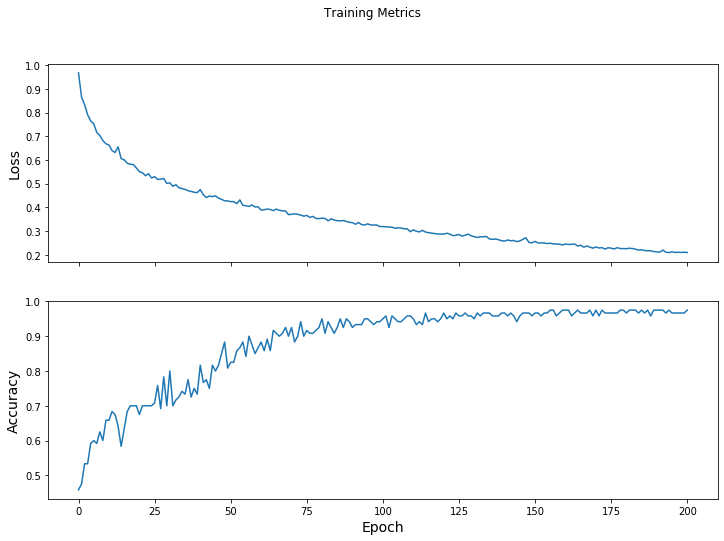

In [62]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [63]:
## Evaluate on test set

test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

In [64]:
test_df = pd.read_csv(test_fp)
test_dataset = tf.data.Dataset.from_tensor_slices((test_df.values[:,:-1],test_df.values[:,-1]))
test_dataset = test_dataset.batch(batch_size)

In [65]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.500%


In [66]:
## new model with another hidden layer so in total we have 1 input layer with size of 4 , 2 hideen layers with sizes of 6 and 1 output layer with output of size 3 for the probabilities of 3 classes that we have (softmax)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(6,activation="relu"), 
  tf.keras.layers.Dense(3)
])

In [67]:
logits = model(X)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             multiple                  30        
_________________________________________________________________
dense_15 (Dense)             multiple                  42        
_________________________________________________________________
dense_16 (Dense)             multiple                  21        
Total params: 93
Trainable params: 93
Non-trainable params: 0
_________________________________________________________________


In [68]:
## Note: Rerunning this cell uses the same model variables

## Create optimizer (chooses learning schedule etc)
optimizer = tf.keras.optimizers.Adam()

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 240

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.702, Accuracy: 35.000%
Epoch 050: Loss: 0.810, Accuracy: 71.667%
Epoch 100: Loss: 0.489, Accuracy: 85.833%
Epoch 150: Loss: 0.334, Accuracy: 96.667%
Epoch 200: Loss: 0.225, Accuracy: 97.500%


In [69]:
## Compute test accuracy
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in train_dataset:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 98.333%
